Flag: Best solution is
[0 1 1 0]
Flag: History is 
[array([0, 0, 1, 0]), array([0, 0, 0, 0]), array([0, 1, 0, 0]), array([1, 1, 0, 0]), array([1, 1, 0, 0]), array([1, 1, 0, 0]), array([0, 0, 0, 0]), array([1, 0, 0, 0]), array([1, 1, 0, 0]), array([1, 1, 0, 0]), array([1, 1, 0, 0]), array([1, 1, 0, 0]), array([1, 1, 0, 0]), array([1, 1, 0, 0]), array([1, 1, 0, 0]), array([1, 1, 0, 0]), array([1, 1, 0, 0]), array([1, 0, 0, 0]), array([1, 1, 0, 0]), array([1, 1, 0, 0]), array([1, 1, 0, 0]), array([1, 1, 0, 0]), array([1, 1, 0, 0]), array([0, 0, 0, 0]), array([0, 0, 1, 0]), array([0, 0, 1, 0]), array([0, 1, 0, 0]), array([0, 1, 1, 0]), array([0, 1, 1, 0]), array([1, 0, 1, 0]), array([1, 0, 0, 1]), array([1, 0, 0, 0]), array([1, 0, 0, 1]), array([1, 0, 0, 1]), array([0, 0, 0, 1]), array([1, 0, 0, 1]), array([1, 0, 0, 1]), array([1, 0, 0, 1]), array([1, 0, 0, 1]), array([1, 0, 0, 1]), array([1, 0, 0, 1]), array([1, 0, 0, 1]), array([1, 0, 0, 1]), array([1, 0, 0, 1]), array([1, 0, 0, 1]), arr

Text(0.5, 1.0, 'Simulated annealing for knapsack problem')

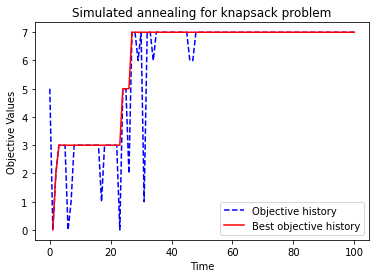

In [44]:

import random
import copy
import matplotlib.pyplot as plt
import numpy as np

def SA_knapsack(T): 

    
    #initialize container for solution history
    history = []
    
    #initailize container for current_objective history
    objective_history = []
    
    #initialize container for iteration history
    iterations = [0]
    
    #initialize container for best objective value history
    best_objective_history = []
    
    # insert knapsack problem parameters(total capacity, weights, values, num of objects)
    # get initial current solution from knapsack_greedy function
    current_solution = knapsack_greedy(8,[2,3,4,5],[1,2,5,6],4)
    
    #add initial current solution to history
    append_element(history,current_solution)
    
    #initialize values for best objective and best solution
    best_objective = float ("-inf")
    best_solution = None
    
    # get initial current objective from objective_function
    current_objective = objective_function(current_solution,[2,3,4,5],[1,2,5,6],8)
    
    #store initial current objective to it's objective history
    append_element(objective_history,current_objective)
    
    #store initial best objective (-INF) to it's best objective history
    append_element(best_objective_history,best_objective)
    
    #for x amount of iterations
    for i in range (100):
        
        # store iterations to plot time on graph
        append_element(iterations,i+1)
        
        # get new solution utilizing neighbour function
        new_solution = neighbour(current_solution)
        # get objective value of that new solution utilizing objective function
        objective_new_solution = objective_function(new_solution,[2,3,4,5],[1,2,5,6],8)
        
        # calculate difference in objective values between current and new
      
        # as time goes on
        # current objective increases 
        # probability of diff -ve increases
        diff = objective_new_solution-current_objective
        
        # as time goes on
        # values will shift towards the left of the exponential curve
        # due to the x = diff/T becoming smaller
        # due to the diff becoming smaller
        # even though the divisor T becomes smaller
        if np.exp(diff/T) > np.random.rand():
            current_objective = objective_function(new_solution,[2,3,4,5],[1,2,5,6],8)
            current_solution= new_solution
        
        # reduce temperature
        T = 0.9*T
        
        # add current_objective to it's container history
        append_element(objective_history,current_objective)
        # add current solution to it's container history 
        append_element(history,current_solution)
        
        # add best_objective to it's container history
        if current_objective > best_objective:
            best_objective = current_objective
            best_solution = current_solution
        append_element(best_objective_history,best_objective)
       
    #Print outputs    
    print("Flag: Best solution is")
    print(best_solution)
    print("Flag: History is ")
    print(history)
    print("Flag: Objective History is")
    print(objective_history)
    print("Flag: Best Objective History is")
    print(best_objective_history)
 
    return best_solution,history,objective_history,iterations,best_objective_history

# appends elements to list
def append_element(current_list,new_element):
    current_list.append(new_element)

#objective function that returns the objective value of a solution    
def objective_function(solution_array,weight_array,values_array,knapsack_capacity_weight):
    resultant_total_value = 0
    resultant_total_weight = 0
    
    # adds all the weights and values 
    for i in range(len(solution_array)):
        add_weight = solution_array[i] * weight_array[i]
        resultant_total_weight += add_weight
        
        add_value = solution_array[i] * values_array[i]
        resultant_total_value += add_value
        
        # if total weight is more than capacity
        # return negative infinity as total value
        if resultant_total_weight > knapsack_capacity_weight:
            return float ("-inf")
    
    # else returns total value    
    return resultant_total_value

#neighbour function to switch an element in solution array
def neighbour(current_array):
    solution_array = copy.deepcopy(current_array)
    solution_array_size = len(solution_array)
    
    # choose randomly between formula 1 or formula 2
    # formula 1 picks a random element and switches it
    # formula 2 picks a random element and switches both it and it's neighbour
    formula_selected = random.randint(1,2)
    if solution_array_size == 1:
        formula_selected = 1
    if solution_array_size == 0:
        formula_selected = 0
    
    if formula_selected == 1:
        index_selected = random.randint(0,solution_array_size-1)
        solution_array[index_selected] = boolean_flip(solution_array[index_selected])
    elif formula_selected == 2:
        index_selected = random.randint(0,solution_array_size-1)
        if index_selected == solution_array_size-1:
            neighbour_index_selected = index_selected - 1
        else:
            neighbour_index_selected = index_selected + 1
        solution_array[index_selected] = boolean_flip(solution_array[index_selected])
        solution_array[neighbour_index_selected] = boolean_flip(neighbour_index_selected)
    
    #returns array after applied formula
    return solution_array
        
# flips a 0 to 1, and a 1 to 0
def boolean_flip(number):
    new_number = -1
    if number == 0:
        new_number = 1
    else:
        new_number = 0
    return new_number

# utilizes greedy approach to get a solution for knapsack problem
# which is then used as initial solution
def knapsack_greedy(knapsack_weight_capacity,weight_array,values_array,amount_of_objects):
    
    # initialize a value per weight array
    value_per_weight_array = np.empty(shape = amount_of_objects)
    objects_chosen_array = np.zeros(shape = amount_of_objects,dtype= int)
    total_weight = 0
    
    # fill up the value per weight array
    for i in range(amount_of_objects):
        value_per_weight = values_array[i] / weight_array[i]
        value_per_weight_array[i] = value_per_weight
    
    # while the knapsack is not full
    # keep filling up knapsack according to value per weight
    # in descending order
    while total_weight <= knapsack_weight_capacity :
        max_vpw_index = np.argmax(value_per_weight_array)
        objects_chosen_array[max_vpw_index] = 1
        total_weight = total_weight + weight_array[max_vpw_index]
        
        if total_weight > knapsack_weight_capacity:
            objects_chosen_array[max_vpw_index] = 0
        else:
            value_per_weight_array[max_vpw_index] = -1
    
    # return solution        
    return objects_chosen_array

# utilize simulated annealing function
sol,hist,obj_hist,iterations,best_obj_hist = SA_knapsack(T = 100)

# plot values
plt.plot(iterations,obj_hist,"b--",label = "Objective history")
plt.plot(iterations,best_obj_hist,"r-",label = "Best objective history")
plt.xlabel("Time")
plt.ylabel("Objective Values")
plt.legend()
plt.title("Simulated annealing for knapsack problem")







